In [5]:
# pip install missingno
# pip install pandas
# pip install yahoo-finance
# pip install numpy
# pip install scikit-learn
# pip install kneed
# pip install dataframe_image

SyntaxError: invalid syntax (<ipython-input-5-509f0a0e64bc>, line 7)

In [15]:
import yahoo_fin.stock_info as si
import pandas as pd
import missingno
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from statsmodels.tsa.stattools import coint
import dataframe_image as dfi
import seaborn as sns
from sklearn.decomposition import PCA


In [17]:
# Extract the nasdaq data from the past 5 years
# Sometimes the code is not correctly working, I guess it's because of the API error. Try to re-run it again.
nasdaq_list = si.tickers_sp500()
nasdaq_historical = {}
for ticker in nasdaq_list:
    nasdaq_historical[ticker] = si.get_data(ticker, start_date="01/01/2017", index_as_date = False, interval="1d")
nasdaq_historical

A
AAL
AAP
AAPL
ABBV
ABC
ABMD
ABT
ACGL
ACN
ADBE
ADI
ADM
ADP
ADSK
AEE
AEP
AES
AFL
AIG
AIZ
AJG
AKAM
ALB
ALGN
ALK
ALL
ALLE
AMAT
AMCR
AMD
AME
AMGN
AMP
AMT
AMZN
ANET
ANSS
AON
AOS
APA
APD
APH
APTV
ARE
ATO
ATVI
AVB
AVGO
AVY
AWK
AXP
AZO
BA
BAC
BALL
BAX
BBWI
BBY
BDX
BEN
BF-B
BIIB
BIO
BK
BKNG
BKR
BLK
BMY
BR
BRK-B
BRO
BSX
BWA
BXP
C
CAG
CAH
CARR
CAT
CB
CBOE
CBRE
CCI
CCL
CDAY
CDNS
CDW
CE
CEG
CF
CFG
CHD
CHRW
CHTR
CI
CINF
CL
CLX
CMA
CMCSA
CME
CMG
CMI
CMS
CNC
CNP
COF
COO
COP
COST
CPB
CPRT
CPT
CRL
CRM
CSCO
CSGP
CSX
CTAS
CTLT
CTRA
CTSH
CTVA
CVS
CVX
CZR
D
DAL
DD
DE
DFS
DG
DGX
DHI
DHR
DIS
DISH
DLR
DLTR
DOV
DOW
DPZ
DRI
DTE
DUK
DVA
DVN
DXC
DXCM
EA
EBAY
ECL
ED
EFX
EIX
EL
ELV
EMN
EMR
ENPH
EOG
EPAM
EQIX
EQR
EQT
ES
ESS
ETN
ETR
ETSY
EVRG
EW
EXC
EXPD
EXPE
EXR
F
FANG
FAST
FBHS
FCX
FDS
FDX
FE
FFIV
FIS
FISV
FITB
FLT
FMC
FOX
FOXA
FRC
FRT
FTNT
FTV
GD
GE
GILD
GIS
GL
GLW
GM
GNRC
GOOG
GOOGL
GPC
GPN
GRMN
GS
GWW
HAL
HAS
HBAN
HCA
HD
HES
HIG
HII
HLT
HOLX
HON
HPE
HPQ
HRL
HSIC
HST
HSY
HUM
HWM
IBM
ICE
IDXX
IEX
IFF
ILMN
INCY
INTC

{'A':            date        open        high         low       close    adjclose  \
 0    2017-01-03   45.930000   46.750000   45.740002   46.490002   44.433609   
 1    2017-01-04   46.930000   47.380001   46.820000   47.099998   45.016621   
 2    2017-01-05   47.049999   47.070000   46.360001   46.540001   44.481400   
 3    2017-01-06   46.630001   48.070000   46.560001   47.990002   45.867260   
 4    2017-01-09   48.009998   48.560001   47.910000   48.139999   46.010624   
 ...         ...         ...         ...         ...         ...         ...   
 1465 2022-10-27  137.259995  137.990005  135.330002  136.490005  136.490005   
 1466 2022-10-28  136.380005  139.119995  135.020004  138.770004  138.770004   
 1467 2022-10-31  137.690002  138.929993  137.350006  138.350006  138.350006   
 1468 2022-11-01  139.500000  141.350006  138.059998  140.889999  140.889999   
 1469 2022-11-02  140.610001  140.940002  138.199997  139.479996  139.479996   
 
        volume ticker  
 0     17

In [18]:
pd.set_option('precision', 4)
data = pd.concat(nasdaq_historical)
data.reset_index(drop=True, inplace=True)
data = data.pivot(index='date', columns='ticker', values = 'adjclose')

In [19]:
# Drop every missing data
missing = data.isnull().mean().sort_values(ascending=False)
drop_list = sorted(list(missing[missing > 0.1].index))
data.drop(labels=drop_list, axis=1, inplace=True)
data = data.fillna(method='ffill')
data0=data.copy(deep=True)

In [20]:
data0=data0.fillna(value=0, limit=1)
data0 = data0.fillna(method='ffill')
data0.isnull().values.any()

False

In [21]:
np.isinf(data0.values.sum())

False

In [22]:
data

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,44.4336,44.7412,161.7303,27.2198,47.7370,75.0418,112.3600,35.1518,28.6300,106.2088,...,81.0327,34.4285,67.8640,55.8802,46.2872,57.1246,95.9356,86.2500,37.5926,51.5918
2017-01-04,45.0166,45.1278,163.0576,27.1894,48.4101,76.9040,115.7400,35.4308,28.8333,106.4642,...,83.6455,34.5811,67.1174,56.3377,46.9771,57.3324,96.8176,87.0300,38.1324,52.0924
2017-01-05,44.4814,44.3450,162.9438,27.3276,48.7773,76.0138,114.8100,35.7369,28.5400,104.8682,...,84.7202,34.5811,66.1169,55.6037,46.5483,57.5222,97.4397,84.7500,37.5143,51.9192
2017-01-06,45.8673,44.6543,160.8108,27.6323,48.7926,77.0312,115.4200,36.7091,28.8233,106.0629,...,85.6375,34.6828,66.0795,55.5656,46.2220,58.2181,97.4490,85.9600,37.7580,52.0828
2017-01-09,46.0106,45.4950,160.7160,27.8854,49.1138,77.6488,117.1100,36.6731,28.4067,104.8774,...,85.9340,34.1573,64.9894,55.7372,46.0262,58.3807,99.3430,85.9700,37.3489,51.9384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27,136.4900,13.9700,188.0800,144.8000,153.5000,155.9000,267.5800,96.9300,51.6900,278.8400,...,55.7900,63.2500,107.5500,30.5100,100.5500,113.9100,111.5600,275.2900,50.3800,150.8195
2022-10-28,138.7700,14.0000,190.6700,155.7400,147.6100,159.3100,258.0600,99.4900,56.6800,287.7800,...,58.3000,65.3700,110.7000,30.8600,102.5200,117.8800,113.4700,288.0000,51.5400,152.9550
2022-10-31,138.3500,14.1800,189.9200,153.3400,146.4000,157.2200,252.0800,98.9400,57.5000,283.9000,...,63.9000,65.1100,110.8100,30.8200,102.4300,118.2500,113.3500,283.2200,51.9400,150.7800


In [23]:
# Start the calculation 
# 252 trading days in a year

returns = data.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['returns']

returns['volatility'] = data.pct_change().std()*np.sqrt(252)
data = returns
data.head()

,returns,volatility
ticker,,
A,0.2342,0.2748
AAL,-0.0333,0.5800
AAP,0.0911,0.3504
AAPL,0.3427,0.3114
ABBV,0.2315,0.2735


In [25]:
# Then make a copy of the dataFrame
data1=data.copy(deep=True)

TypeError: 'deep' is an invalid keyword argument for copy()

In [11]:

#Fit the scaler
X = pd.DataFrame(StandardScaler().fit(data).fit_transform(data),columns = data.columns, index = data.index)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


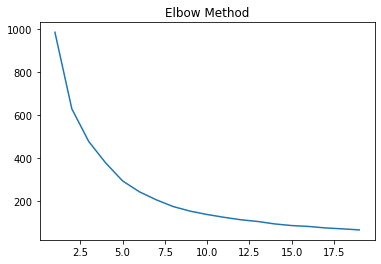

In [12]:
# Use Elbow method to determine the K value
K = range(1,20)
distortions = []
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
plt.plot(K, distortions)
plt.title('Elbow Method')
plt.show()

In [13]:
# We know the K-value we should use
kl = KneeLocator(K, distortions, curve="convex", direction="decreasing")
# Save the number of clusters using b
a=kl.elbow
a

5

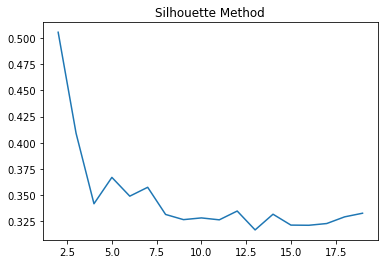

4

In [14]:
# Use Silhouette method to determine the K value
K = range(2,20)
silhouettes = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
    kmeans.fit(X)
    silhouettes.append(silhouette_score(X, kmeans.labels_))
plt.plot(K, silhouettes)
plt.title('Silhouette Method')
plt.show()

kl = KneeLocator(K, silhouettes, curve="convex", direction="decreasing")
# Save the number of clusters using b
b=kl.elbow
b

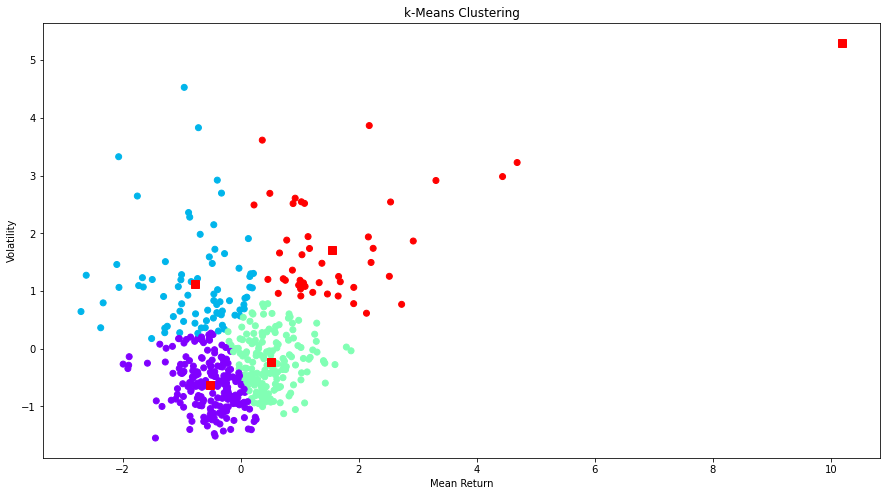

In [15]:
# Apply the K-means model for the silhoutte
k_means = KMeans(n_clusters=a)
k_means.fit(X)
prediction = k_means.predict(X)

#Plot the results
centroids = k_means.cluster_centers_
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label = X.index)
ax.set_title('k-Means Clustering')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.plot(centroids[:,0],centroids[:,1],'rs',markersize=8)
plt.show()

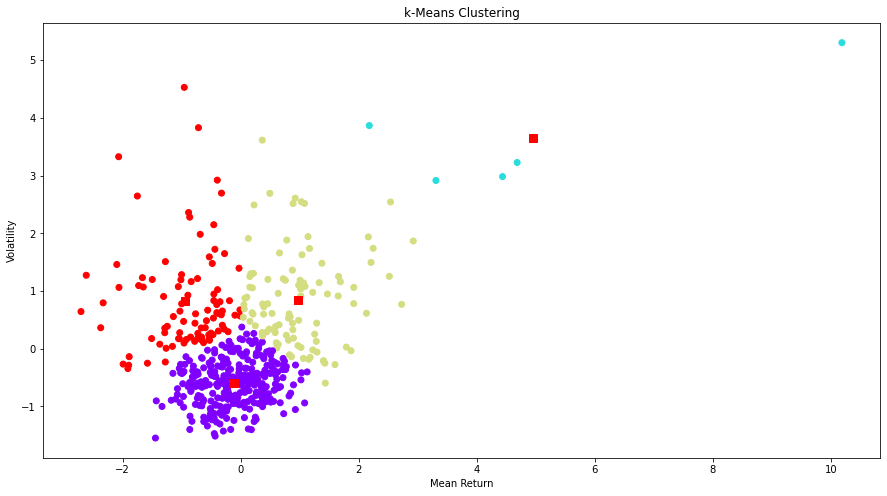

In [16]:
# Apply the K-means model for the elbow
k_means = KMeans(n_clusters=b)
k_means.fit(X)
prediction = k_means.predict(X)

#Plot the results
centroids = k_means.cluster_centers_
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label = X.index)
ax.set_title('k-Means Clustering')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.plot(centroids[:,0],centroids[:,1],'rs',markersize=8)
plt.show()

In [17]:
clustered_groups = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_groups_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_groups = clustered_groups[clustered_groups != -1]


In [18]:
cluster_size_limit = 1000
counts = clustered_groups.value_counts()
ticker_count = counts[(counts>1) & (counts<=cluster_size_limit)]
print ("Number of clusters: %d" % len(ticker_count))
print ("Number of Pairs: %d" % (ticker_count*(ticker_count-1)).sum())

Number of clusters: 4
Number of Pairs: 105414


In [19]:
print(clustered_groups)

ticker
A       0
AAL     3
AAP     3
AAPL    2
ABBV    0
       ..
YUM     0
ZBH     0
ZBRA    2
ZION    3
ZTS     0
Length: 492, dtype: int32


In [21]:
clustered_groups.to_csv('SP500_2019.csv', index=True)

In [27]:
cluster_dict = {}
n = data0.shape[1]
keys=data0.keys()
pairs=[]
for i in range(n-1):
    Stock_target = data0[keys[i]] 
    Stock_target_group=clustered_groups[i]
    for j in range(i+1, n):
        if(clustered_groups[j]==Stock_target_group):
            Compared_stock = data0[keys[j]]
            score, pvalue, _ = coint(Stock_target, Compared_stock)
            if pvalue < 0.01:
                pairs.append((keys[i], keys[j]))
    
    
print ("Number of pairs:", len(pairs))
print ("In those pairs, we found %d unique tickers." % len(np.unique(pairs)))
print(pairs)

Number of pairs: 912
In those pairs, we found 351 unique tickers.
[('A', 'INVH'), ('A', 'ORCL'), ('A', 'TGT'), ('A', 'TT'), ('ABBV', 'ABC'), ('ABC', 'ADM'), ('ABC', 'KR'), ('ABT', 'AWK'), ('ABT', 'CPRT'), ('ABT', 'ICE'), ('ABT', 'MA'), ('ABT', 'NEE'), ('ABT', 'NSC'), ('ABT', 'ROP'), ('ABT', 'STE'), ('ABT', 'UNP'), ('ABT', 'WMT'), ('ABT', 'WTW'), ('ABT', 'ZTS'), ('ACN', 'DHR'), ('ACN', 'HD'), ('ACN', 'INVH'), ('ACN', 'IQV'), ('ACN', 'LOW'), ('ACN', 'NDSN'), ('ACN', 'PLD'), ('ADBE', 'BBY'), ('ADBE', 'CRM'), ('ADI', 'AME'), ('ADI', 'AWK'), ('ADI', 'CDW'), ('ADI', 'DHR'), ('ADI', 'DOV'), ('ADI', 'EXPD'), ('ADI', 'FAST'), ('ADI', 'HD'), ('ADI', 'HOLX'), ('ADI', 'INVH'), ('ADI', 'IQV'), ('ADI', 'J'), ('ADI', 'LIN'), ('ADI', 'LOW'), ('ADI', 'MSFT'), ('ADI', 'MTD'), ('ADI', 'NEE'), ('ADI', 'ORCL'), ('ADI', 'PLD'), ('ADI', 'POOL'), ('ADI', 'SHW'), ('ADI', 'STE'), ('ADI', 'TECH'), ('ADI', 'TGT'), ('ADI', 'TMO'), ('ADI', 'TT'), ('ADI', 'TXN'), ('ADI', 'UNP'), ('ADP', 'ORLY'), ('ADP', 'WM'), ('ADS

array(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AIZ', 'AJG',
       'AKAM', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME',
       'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'AON', 'AOS', 'APA',
       'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVGO', 'AVY', 'AWK',
       'AXP', 'AZO', 'BAC', 'BAX', 'BBWI', 'BBY', 'BDX', 'BF-B', 'BIIB',
       'BIO', 'BKNG', 'BKR', 'BLK', 'BR', 'BRK-B', 'BRO', 'BSX', 'BWA',
       'CAG', 'CAT', 'CB', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE',
       'CF', 'CFG', 'CHRW', 'CHTR', 'CINF', 'CL', 'CMA', 'CMCSA', 'CME',
       'CMG', 'CMI', 'CMS', 'CNC', 'COF', 'COO', 'COST', 'CPRT', 'CPT',
       'CRL', 'CRM', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTLT', 'CTSH', 'CVS',
       'CZR', 'D', 'DAL', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS',
       'DISH', 'DLR', 'DLTR', 'DOV', 'DPZ', 'DTE', 'DUK', 'DVA', 'DVN',
       'DXC', 'EA', 'EBAY', 'ECL', 'EFX', 'EIX', 'EL', '

In [30]:
df = pd.DataFrame (pairs, columns = ['First Stock','Second Stock'])

In [32]:
df.to_csv('pairs.csv', index=False)

In [3]:
df_pairs=pd.read_csv('pairs.csv')

In [31]:
df_pairs

,First Stock,Second Stock
0,A,INVH
1,A,ORCL
2,A,TGT
3,A,TT
4,ABBV,ABC
...,...,...
907,V,WMT
908,VRSK,WMT
909,WMT,WTW
910,WMT,XEL


In [12]:
sns.catplot(data=df_pairs, x="PCA", y="total_bill")

ValueError: Could not interpret input 'day'